## Statistics in Python
- mean, median, mode
- Quartiles, Kurtosis, Skewness
- outliers
- others
- Distributions
- Correlations, Covariance
- Hypothesis Test

In [3]:
import numpy  as np
import pandas as pd
from pydataset import data
import random
import scipy

In [5]:
# Data
df= data('mtcars')
df.head(2)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


### Quick Profile

In [6]:
df.describe()          # count, mean, std, min, quartiles, max

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [7]:
df.dtypes              # data types

mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object

In [8]:
df.shape               # rows, columns

(32, 11)

### Central Tendency

In [9]:
df["mpg"].mean()       # mean

20.090625000000003

In [10]:
df["mpg"].median()     # median

19.2

In [11]:
df["gear"].mode()      # mode (can return multiple); Highest freq

0    3
Name: gear, dtype: int64

### Dispersion (spread)

In [12]:
df["mpg"].std()        # standard deviation

6.026948052089105

In [13]:
df["mpg"].var()        # variance

36.32410282258065

In [14]:
df["mpg"].quantile([.25,.5,.75])  # quartiles

0.25    15.425
0.50    19.200
0.75    22.800
Name: mpg, dtype: float64

In [15]:
(df["mpg"].quantile(.75) - df["mpg"].quantile(.25))  # IQR

7.375

### Shape of Distribution

In [16]:
df["mpg"].skew()       # skewness (asymmetry)

0.6723771376290805

In [17]:
df["mpg"].kurt()       # kurtosis (tail heaviness)

-0.0220062914240855

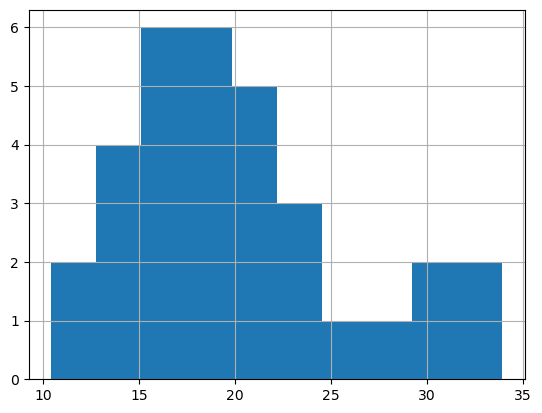

In [19]:
df['mpg'].hist();

### Relationships
- strong |correlation| suggests linear association. In mtcars, mpg and wt correlate negatively (heavier → lower mpg), which you can also see in the scatter plot.

In [21]:
df[["mpg","disp","hp","wt","qsec"]].corr()  # Pearson correlations

,mpg,disp,hp,wt,qsec
mpg,1.000000,-0.847551,-0.776168,-0.867659,0.418684
disp,-0.847551,1.000000,0.790949,0.887980,-0.433698
hp,-0.776168,0.790949,1.000000,0.658748,-0.708223
wt,-0.867659,0.887980,0.658748,1.000000,-0.174716
qsec,0.418684,-0.433698,-0.708223,-0.174716,1.000000


In [22]:
df[["mpg","disp","hp","wt","qsec"]].cov()   # covariances

,mpg,disp,hp,wt,qsec
mpg,36.324103,-633.097208,-320.732056,-5.116685,4.509149
disp,-633.097208,15360.799829,6721.158669,107.684204,-96.051681
hp,-320.732056,6721.158669,4700.866935,44.192661,-86.770081
wt,-5.116685,107.684204,44.192661,0.957379,-0.305482
qsec,4.509149,-96.051681,-86.770081,-0.305482,3.193166


### Grouped Comparisions

In [25]:
df.groupby("cyl")[["mpg","hp","wt"]].agg(["mean","median","std","count"])

mpg                                 hp                          \
          mean median       std count        mean median        std count   
cyl                                                                         
4    26.663636   26.0  4.509828    11   82.636364   91.0  20.934530    11   
6    19.742857   19.7  1.453567     7  122.285714  110.0  24.260491     7   
8    15.100000   15.2  2.560048    14  209.214286  192.5  50.976886    14   

           wt                         
         mean median       std count  
cyl                                   
4    2.285727  2.200  0.569564    11  
6    3.117143  3.215  0.356346     7  
8    3.999214  3.755  0.759405    14

In [26]:
pd.crosstab(df["cyl"], df["gear"])

gear,3,4,5
cyl,,,
4,1,8,2
6,2,4,1
8,12,0,2


In [27]:
df["gear"].value_counts().sort_index()

gear
3    15
4    12
5     5
Name: count, dtype: int64

In [ ]:
## Linear Regression

In [28]:
# mpg ~ wt
import numpy as np
b1, b0 = np.polyfit(df["wt"], df["mpg"], 1)  # slope, intercept
pred = b1*df["wt"] + b0
r2 = 1 - ((df["mpg"]-pred).pow(2).sum() / (df["mpg"]-df["mpg"].mean()).pow(2).sum())

In [29]:
r2

0.7528327936582646

## Outliers
- Z-score
    - Standardize values (subtract mean, divide by std).
    - If |z| > 3 (common rule), treat as an outlier.

- IQR
    - Q1 = 25th percentile, Q3 = 75th percentile, IQR = Q3 − Q1.
    - Outliers: values below Q1 − 1.5×IQR or above Q3 + 1.5×IQR.
- Sometimes you know realistic bounds.
    - Example: “mpg” can’t be negative or above 80 → treat those as outliers.
- Strategies
    - Always visualize before and after cleaning.
    - Document why you removed/capped points (transparency).
    - In predictive modeling, check whether outliers represent errors (typos, sensor issues) or rare but valid cases (Ferrari in mtcars).

In [30]:
import seaborn as sns

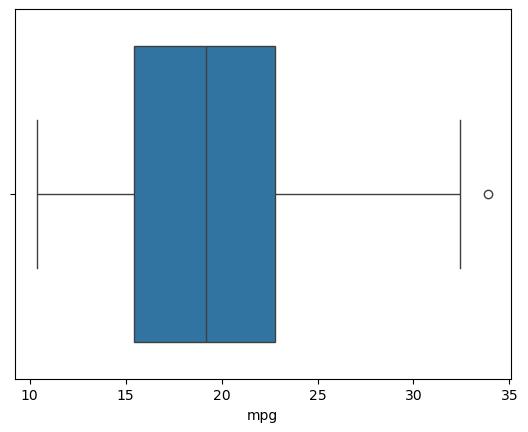

In [33]:
# Box  Plot
sns.boxplot(x=df["mpg"]);

<Axes: xlabel='wt', ylabel='mpg'>

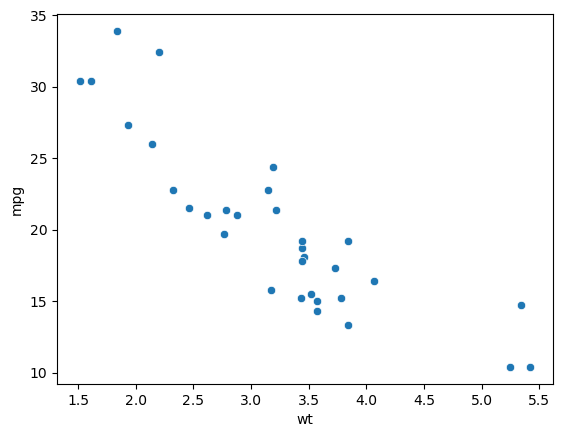

In [34]:
# Scatterplot (for bivariate cases, e.g., mpg vs wt)
sns.scatterplot(x="wt", y="mpg", data=df)

In [35]:
from scipy import stats
import numpy as np

In [36]:
z_scores = np.abs(stats.zscore(df["mpg"]))
outliers_z = df[z_scores > 3]
outliers_z

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb


In [45]:
Q1 = df["mpg"].quantile(0.25)
Q3 = df["mpg"].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df[(df["mpg"] < (Q1 - 1.5 * IQR)) | (df["mpg"] > (Q3 + 1.5 * IQR))]
outliers_iqr # one car outlier using IQR method on mpg column

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg_clipped
Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.9,1,1,4,1,33.8625


### Removing Outliers
- Removing isn’t always best — sometimes you should transform or cap instead:

In [46]:
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print('MPG ', 'Lower Limit -', lower_limit , ' Upper Limit - ', upper_limit)
df["mpg_clipped"] = df["mpg"].clip(lower=lower_limit, upper=upper_limit)

MPG  Lower Limit - 4.362500000000001  Upper Limit -  33.8625


In [47]:
print(df.shape)
df # No Outlier here

(32, 12)


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg_clipped
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,21.0000
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,21.0000
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,22.8000
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,21.4000
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,18.7000
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,18.1000
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,14.3000
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,24.4000
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,22.8000
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,19.2000


In [ ]:
#### Transformation (e.g., log transform skewed data):

In [48]:
df["mpg_log"] = np.log(df["mpg"])

In [49]:
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg_clipped,mpg_log
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,21.0000,3.044522
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,21.0000,3.044522
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,22.8000,3.126761
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,21.4000,3.063391
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,18.7000,2.928524
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,18.1000,2.895912
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,14.3000,2.660260
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,24.4000,3.194583
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,22.8000,3.126761
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,19.2000,2.954910


## Check outliers on all columns
- advanced

In [53]:
import pandas as pd
df = data('mtcars')
# Select numeric columns
numeric_cols = df.select_dtypes(include="number").columns
numeric_cols

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

In [59]:
# Function - Dictionary to store outlier indices for each column
outlier_dict = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Find outliers
    mask = (df[col] < lower) | (df[col] > upper)
    outlier_dict[col] = df.loc[mask, [col]]

In [63]:
# Combine results
for col, outliers in outlier_dict.items():
    if not outliers.empty:
        print(f"\n\t Outliers in column: {col}")
        print( outliers)


	 Outliers in column: mpg
                 mpg
Toyota Corolla  33.9

	 Outliers in column: hp
                hp
Maserati Bora  335

	 Outliers in column: wt
                        wt
Cadillac Fleetwood   5.250
Lincoln Continental  5.424
Chrysler Imperial    5.345

	 Outliers in column: qsec
          qsec
Merc 230  22.9

	 Outliers in column: carb
               carb
Maserati Bora     8


## Hypothesis Tests
- z test
- t test
- chi square
- F Test
- A/B Testing

### A/B Testing
- A/B Testing (also called split testing) is a statistical method used to compare two versions of something (like a website, ad, email, product feature) to see which performs better.
	•	Group A = Control group (original version).
	•	Group B = Treatment group (new version).
- The goal: determine if changes in B lead to a significant improvement compared to A.
- A controlled experiment that randomly splits users (or units) into:
    - A (control) – current experience
    - B (treatment) – new experience
- and compares a primary metric (e.g., conversion rate, avg. revenue) to decide if B is better, worse, or unchanged relative to A.
- Core steps
    - Define hypothesis & metric (e.g., “B increases conversion rate”).
        - H0 (null hypothesis): No difference between A and B.
        - H1 (alternative): B is better (or worse). 
    - Randomly assign users to A/B.
    - Collect data for enough samples (sample size based on power/α).
    - Use statistical tests (t-test, chi-square, etc.) to check if the difference is significant.
    - Analyze:
        - Binary metric → two-proportion z-test.
        - Continuous metric → Welch t-test (or bootstrap CI if assumptions doubtful).
    - Decide & ship (consider practical + statistical significance).
    - Guardrails: pre-register stop rules; avoid peeking; segment cautiously; adjust for multiple tests if needed.
### A/B testing is a core skill for analysts because:
    - Helps make data-driven decisions instead of assumptions.
    - Used in product improvements, marketing campaigns, user experience design.
    - Analysts must know how to design tests, avoid bias, and interpret results statistically (p-values, confidence intervals).

In [86]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
import matplotlib.pyplot as plt

#### Example
- you run an e-commerce site testing a new checkout page (B) against the old one (A).
We measure conversion rate (whether a user made a purchase or not: 1 = purchase, 0 = no purchase).

In [81]:
# Simulated Data
np.random.seed(42)  # this repeats the data
# Group A (old page): 1000 users, 120 converted (12%)
A = np.random.choice([0,1], size=1000, p=[0.88,0.12])

# Group B (new page): 1000 users, 150 converted (15%)
B = np.random.choice([0,1], size=1000, p=[0.85,0.15])
print('A values are ', A, ':', A.mean())
print('B values area ', B, ':', B.mean())

A values are  [0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0
 0 0 0 0 1 

In [78]:
# Conversion rates
conv_A = A.mean()
conv_B = B.mean()
print(f"Conversion Rate A: {conv_A:.2%}")
print(f"Conversion Rate B: {conv_B:.2%}")

Conversion Rate A: 12.40%
Conversion Rate B: 15.20%


In [76]:
# Two-sample proportion test (Chi-square or z-test)
count = np.array([A.sum(), B.sum()])   # number of successes
nobs = np.array([len(A), len(B)])      # number of trials

stat, pval = stats.chisquare(count)  # (not ideal for proportions)
print(f"Stat is {stat} and p-value is {pval}")

Stat is 2.8405797101449277 and p-value is 0.09191104899535937


In [74]:
# Better: proportions_ztest
zstat, pval = proportions_ztest(count, nobs)
print(f"Z-statistic: {zstat:.3f}, p-value: {pval:.3f}")

Z-statistic: -1.815, p-value: 0.069


In [77]:
if pval < 0.05:
    print("✅ Significant difference! New page performs better.")
else:
    print("❌ No significant difference. Stick with old page.")

❌ No significant difference. Stick with old page.


- A/B Testing helps decide if changes are real improvements or just random chance.
- Python libraries like scipy and statsmodels make it easy.
- Always check p-value < 0.05 (common threshold) before concluding.

Group A: 124/1000  -> CR=12.400%,  95% CI=(10.500%, 14.588%)
Group B: 152/1000  -> CR=15.200%,  95% CI=(13.108%, 17.558%)
Z = -1.815, p-value = 0.0919
Significant at 5%? NO


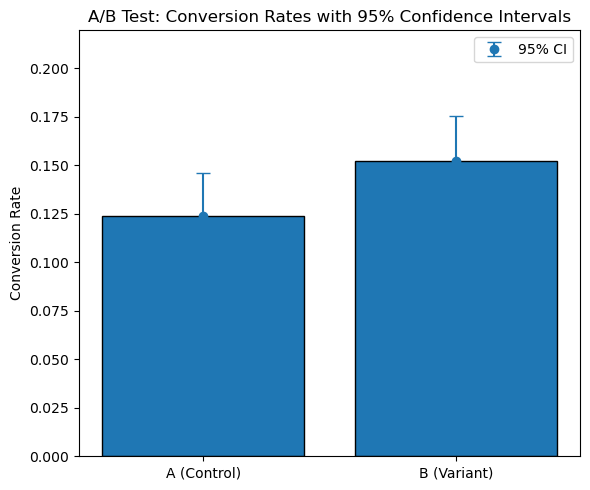

In [87]:
# ---- 3) Conversion rates + 95% CIs (Wilson) ----
A_success, A_total = A.sum(), len(A)
B_success, B_total = B.sum(), len(B)
pA = A_success / A_total
pB = B_success / B_total

ci_low, ci_high = proportion_confint(count, nobs, alpha=0.05, method="wilson")
A_low, B_low   = ci_low
A_high, B_high = ci_high

print(f"Group A: {A_success}/{A_total}  -> CR={pA:.3%},  95% CI=({A_low:.3%}, {A_high:.3%})")
print(f"Group B: {B_success}/{B_total}  -> CR={pB:.3%},  95% CI=({B_low:.3%}, {B_high:.3%})")
print(f"Z = {zstat:.3f}, p-value = {pval:.4f}")
print("Significant at 5%?" , "YES" if pval < 0.05 else "NO")

# ---- 4) Plot conversion rates with CI error bars ----
groups = ["A (Control)", "B (Variant)"]
rates = [pA, pB]
yerr_lower = [pA - A_low, pB - B_low]
yerr_upper = [A_high - pA, B_high - pB]

plt.figure(figsize=(6, 5))
plt.bar(groups, rates, edgecolor="black")
plt.errorbar(groups, rates, 
             yerr=[yerr_lower, yerr_upper],
             fmt='o', capsize=5, label="95% CI")
plt.ylabel("Conversion Rate")
plt.title("A/B Test: Conversion Rates with 95% Confidence Intervals")
plt.ylim(0, max(rates + [A_high, B_high]) * 1.25)
plt.legend()
plt.tight_layout()
plt.show()